<a href="https://colab.research.google.com/github/varshum12/DL-27-Nov-2025/blob/main/CNN_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets  import mnist

In [3]:
(x_train,  y_train) ,  (x_test  ,  y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
print(x_train.shape  , y_train.shape)
print(x_test.shape  ,  y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
x1  =  x_train[0]

In [32]:
x1.shape

(28, 28)

In [10]:
import matplotlib.pyplot as plt


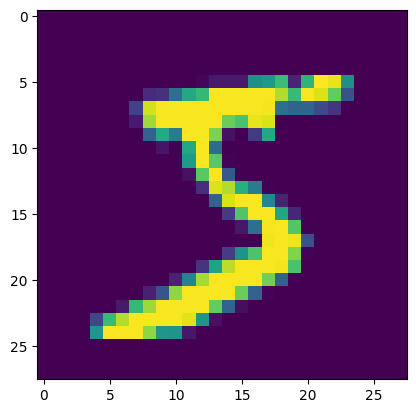

In [11]:
plt.imshow(x_train[0])

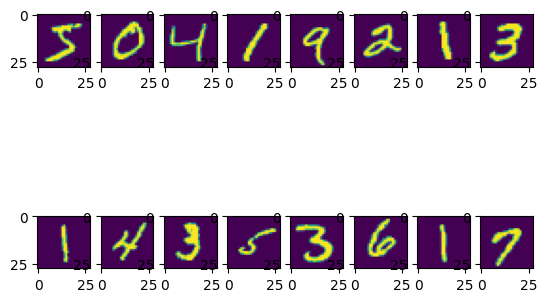

In [18]:
for  i  in range(16):
  plt.subplot(2,8 ,  i+1)
  plt.imshow(x_train[i])

### feature scaling  

In [19]:
x_train1  =  x_train/255
x_test1  =  x_test/255

to  catgorical

In [21]:
import numpy as  np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [23]:
from keras.utils  import to_categorical

In [24]:
y_train1  =  to_categorical(y_train)
y_test1 =  to_categorical(y_test)

In [25]:
y_train1

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [29]:
y_train1[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [27]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [30]:
##  model  fiting

In [33]:
from keras.models  import Sequential
from keras.layers  import Conv2D ,  MaxPool2D ,  Dropout ,  BatchNormalization , Flatten , Dense



In [43]:
nn =  Sequential()

## add  convolutional  layer
nn.add(Conv2D(filters  =  16  , kernel_size=(3 ,3) ,  input_shape  =  (28 , 28  , 1)))
nn.add(MaxPool2D(pool_size  =  (2,2)))
nn.add(BatchNormalization())


nn.add(Conv2D(filters  =  16  , kernel_size=(3 ,3) ,  input_shape  =  (28 , 28  , 1)))
nn.add(MaxPool2D(pool_size  =  (2,2)))
nn.add(BatchNormalization())

nn.add(Conv2D(filters  =  16  , kernel_size=(3 ,3) ,  input_shape  =  (28 , 28  , 1)))
nn.add(MaxPool2D(pool_size  =  (2,2)))
nn.add(BatchNormalization())

nn.add(Flatten())

nn.add(Dense(units  =  1000 ,  activation  = 'relu'  ))
nn.add(Dense(units  =  1000 ,  activation  = 'relu'  ))
nn.add(Dense(units  =  1000 ,  activation  = 'relu'  ))
nn.add(Dropout(0.3))


nn.add(Dense(units  = 10   , activation  =  'softmax'  ))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
## compile model
nn.compile(optimizer  =  'adam' ,
           loss  =  'categorical_crossentropy' ,
           metrics =  ['accuracy'])

In [45]:
nn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 13, 13, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 5, 5, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 1, 1, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1000)           │        17,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,034,002 (7.76 MB)

 Trainable params: 2,033,906 (7.76 MB)

 Non-trainable params: 96 (384.00 B)

In [46]:
## model  fitting
from keras.callbacks  import EarlyStopping
er  = EarlyStopping(monitor  =  'val_loss' ,  patience  =  5)

In [47]:
hist    =  nn.fit(x_train1  , y_train1  ,  validation_split= 0.2  ,
                  epochs =  100  ,
                  callbacks  =  er  ,
                  )

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8322 - loss: 0.5193 - val_accuracy: 0.9531 - val_loss: 0.1649
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9528 - loss: 0.1618 - val_accuracy: 0.9680 - val_loss: 0.1142
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9613 - loss: 0.1289 - val_accuracy: 0.9743 - val_loss: 0.0882
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9689 - loss: 0.1073 - val_accuracy: 0.9700 - val_loss: 0.1056
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9717 - loss: 0.0964 - val_accuracy: 0.9768 - val_loss: 0.0857
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9748 - loss: 0.0828 - val_accuracy: 0.9783 - val_loss: 0.0803
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9758 - loss: 0.0778 - val_accuracy: 0.9798 - val_loss: 0.0744
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9786 - loss: 

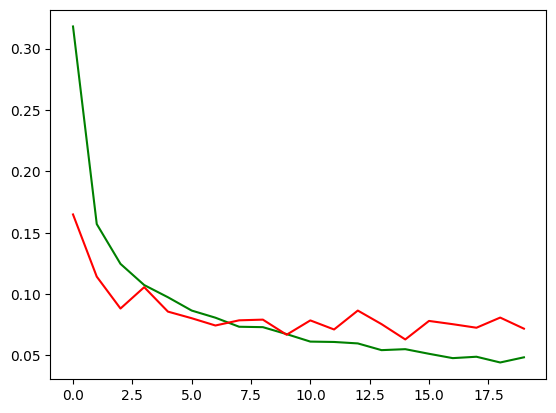

In [48]:
plt.plot(hist.history['loss'] , c=  'green')
plt.plot(hist.history['val_loss'] , c=  'red')

In [50]:
nn.evaluate(x_train1  ,  y_train1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9916 - loss: 0.0261


[0.03386266157031059, 0.9898333549499512]

In [51]:
nn.evaluate(x_test1  ,  y_test1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9741 - loss: 0.0993


[0.07560211420059204, 0.9807999730110168]

In [55]:
train_pred_prob  =  nn.predict(x_train1)
train_pred_prob
test_pred_prob  =  nn.predict(x_test1)
test_pred_prob

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[1.3903818e-15, 2.1550581e-09, 9.8249648e-09, ..., 1.0000000e+00,
        1.4990169e-12, 1.3409573e-09],
       [4.9886764e-14, 3.8134088e-12, 1.0000000e+00, ..., 3.0850929e-14,
        1.7928322e-13, 2.6626207e-19],
       [1.4931945e-21, 1.0000000e+00, 6.1362814e-18, ..., 1.9598991e-16,
        3.1182108e-17, 3.3273551e-25],
       ...,
       [1.7811403e-18, 4.0555023e-14, 4.9146261e-13, ..., 7.0182380e-13,
        3.2127157e-14, 6.7253820e-09],
       [1.7192265e-14, 1.3328284e-16, 2.5006846e-12, ..., 2.7567632e-15,
        1.0334330e-08, 2.4808220e-12],
       [1.1723391e-01, 1.0075698e-04, 3.4413148e-02, ..., 8.8305505e-06,
        5.4268025e-05, 1.1892687e-06]], dtype=float32)

In [56]:
train_pred  =  np.argmax(train_pred_prob  ,  axis  =  -1)
test_pred  =  np.argmax(test_pred_prob  ,  axis  =  -1)

In [57]:
train_pred

array([5, 0, 4, ..., 5, 6, 8])

In [58]:
test_pred

array([7, 2, 1, ..., 4, 5, 6])

evaluation

In [59]:
from sklearn.metrics  import classification_report ,  confusion_matrix

In [60]:
print(classification_report(y_train,  train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5923
           1       0.99      1.00      0.99      6742
           2       0.98      0.99      0.99      5958
           3       0.99      0.99      0.99      6131
           4       0.99      0.99      0.99      5842
           5       0.99      0.98      0.99      5421
           6       0.99      0.99      0.99      5918
           7       0.99      0.98      0.99      6265
           8       0.99      0.99      0.99      5851
           9       0.99      0.99      0.99      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



In [61]:
confusion_matrix(y_train  ,  train_pred)

array([[5903,    1,    5,    1,    1,    0,    4,    4,    2,    2],
       [   0, 6726,    4,    0,    2,    1,    1,    2,    6,    0],
       [   5,   14, 5914,    5,    2,    0,    0,   16,    2,    0],
       [   1,    1,   26, 6070,    1,   12,    0,    5,    9,    6],
       [   5,    6,    1,    1, 5783,    0,   11,    1,    4,   30],
       [  16,    1,    6,   15,    1, 5325,   45,    5,    4,    3],
       [  52,    3,    3,    0,    7,    1, 5852,    0,    0,    0],
       [   5,   33,   29,   13,    9,    0,    0, 6159,    4,   13],
       [  10,    1,   31,    3,    2,    7,   20,    0, 5771,    6],
       [  18,    1,    6,    4,   16,    8,    1,    6,    2, 5887]])

In [63]:
print(classification_report(y_test,  test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.97      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [64]:
confusion_matrix(y_test ,  test_pred)

array([[ 974,    1,    4,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1132,    0,    1,    0,    0,    0,    0,    2,    0],
       [   2,    1, 1022,    0,    1,    0,    1,    5,    0,    0],
       [   0,    1,    5,  996,    0,    4,    0,    3,    1,    0],
       [   1,    1,    0,    1,  965,    0,    5,    0,    0,    9],
       [   5,    1,    0,    6,    0,  870,    8,    1,    1,    0],
       [  15,    3,    0,    0,    5,    0,  934,    0,    1,    0],
       [   1,   11,    9,    6,    4,    0,    0,  989,    3,    5],
       [   3,    0,   10,    2,    1,    2,    6,    0,  947,    3],
       [   4,    1,    2,    0,    8,    7,    0,    3,    5,  979]])